In [1]:
from PIL import Image
from itranslate import itranslate as itrans
from google_trans_new import google_translator 
from googletrans import Translator
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [2]:
log = pd.read_csv('TwitterAPI.csv')
log

,key
0,zJAuUpzgyEC802WR4TFZ456EX
1,Eht79jNoQ4WTXEuPJp3z9o3H30TuEQTvNKswckCmn62TXk...
2,929542087552385026-HAEnxfTG4dK7niHU9wnsgUF2mJ3...
3,yMy383hkK517JsmOGmZMfued7VjNhPcJC6uYSQrStF5zK
4,AAAAAAAAAAAAAAAAAAAAANLtegEAAAAAp9SBLjYOVC1a8x...


In [3]:
id_stopwords = ['ada',
'adalah',
'adanya',
'adapun',
'agak',
'agaknya',
'agar',
'akan',
'akankah',
'akhir',
'akhiri',
'akhirnya',
'aku',
'akulah',
'amat',
'amatlah',
'anda',
'andalah',
'antar',
'antara',
'antaranya',
'apa',
'apaan',
'apabila',
'apakah',
'apalagi',
'apatah',
'artinya',
'asal',
'asalkan',
'atas',
'atau',
'ataukah',
'ataupun',
'awal',
'awalnya',
'bagai',
'bagaikan',
'bagaimana',
'bagaimanakah',
'bagaimanapun',
'bagi',
'bagian',
'bahkan',
'bahwa',
'bahwasanya',
'baik',
'bakal',
'bakalan',
'balik',
'banyak',
'bapak',
'baru',
'bawah',
'beberapa',
'begini',
'beginian',
'beginikah',
'beginilah',
'begitu',
'begitukah',
'begitulah',
'begitupun',
'bekerja',
'belakang',
'belakangan',
'belum',
'belumlah',
'benar',
'benarkah',
'benarlah',
'berada',
'berakhir',
'berakhirlah',
'berakhirnya',
'berapa',
'berapakah',
'berapalah',
'berapapun',
'berarti',
'berawal',
'berbagai',
'berdatangan',
'beri',
'berikan',
'berikut',
'berikutnya',
'berjumlah',
'berkali-kali',
'berkata',
'berkehendak',
'berkeinginan',
'berkenaan',
'berlainan',
'berlalu',
'berlangsung',
'berlebihan',
'bermacam',
'bermacam-macam',
'bermaksud',
'bermula',
'bersama',
'bersama-sama',
'bersiap',
'bersiap-siap',
'bertanya',
'bertanya-tanya',
'berturut',
'berturut-turut',
'bertutur',
'berujar',
'berupa',
'besar',
'betul',
'betulkah',
'biasa',
'biasanya',
'bila',
'bilakah',
'bisa',
'bisakah',
'boleh',
'bolehkah',
'bolehlah',
'buat',
'bukan',
'bukankah',
'bukanlah',
'bukannya',
'bulan',
'bung',
'cara',
'caranya',
'cukup',
'cukupkah',
'cukuplah',
'cuma',
'dahulu',
'dalam',
'dan',
'dapat',
'dari',
'daripada',
'datang',
'dekat',
'demi',
'demikian',
'demikianlah',
'dengan',
'depan',
'di',
'dia',
'diakhiri',
'diakhirinya',
'dialah',
'diantara',
'diantaranya',
'diberi',
'diberikan',
'diberikannya',
'dibuat',
'dibuatnya',
'didapat',
'didatangkan',
'digunakan',
'diibaratkan',
'diibaratkannya',
'diingat',
'diingatkan',
'diinginkan',
'dijawab',
'dijelaskan',
'dijelaskannya',
'dikarenakan',
'dikatakan',
'dikatakannya',
'dikerjakan',
'diketahui',
'diketahuinya',
'dikira',
'dilakukan',
'dilalui',
'dilihat',
'dimaksud',
'dimaksudkan',
'dimaksudkannya',
'dimaksudnya',
'diminta',
'dimintai',
'dimisalkan',
'dimulai',
'dimulailah',
'dimulainya',
'dimungkinkan',
'dini',
'dipastikan',
'diperbuat',
'diperbuatnya',
'dipergunakan',
'diperkirakan',
'diperlihatkan',
'diperlukan',
'diperlukannya',
'dipersoalkan',
'dipertanyakan',
'dipunyai',
'diri',
'dirinya',
'disampaikan',
'disebut',
'disebutkan',
'disebutkannya',
'disini',
'disinilah',
'ditambahkan',
'ditandaskan',
'ditanya',
'ditanyai',
'ditanyakan',
'ditegaskan',
'ditujukan',
'ditunjuk',
'ditunjuki',
'ditunjukkan',
'ditunjukkannya',
'ditunjuknya',
'dituturkan',
'dituturkannya',
'diucapkan',
'diucapkannya',
'diungkapkan',
'dong',
'dua',
'dulu',
'empat',
'enggak',
'enggaknya',
'entah',
'entahlah',
'guna',
'gunakan',
'hal',
'hampir',
'hanya',
'hanyalah',
'hari',
'harus',
'haruslah',
'harusnya',
'hendak',
'hendaklah',
'hendaknya',
'hingga',
'ia',
'ialah',
'ibarat',
'ibaratkan',
'ibaratnya',
'ibu',
'ikut',
'ingat',
'ingat-ingat',
'ingin',
'inginkah',
'inginkan',
'ini',
'inikah',
'inilah',
'itu',
'itukah',
'itulah',
'jadi',
'jadilah',
'jadinya',
'jangan',
'jangankan',
'janganlah',
'jauh',
'jawab',
'jawaban',
'jawabnya',
'jelas',
'jelaskan',
'jelaslah',
'jelasnya',
'jika',
'jikalau',
'juga',
'jumlah',
'jumlahnya',
'justru',
'kala',
'kalau',
'kalaulah',
'kalaupun',
'kalian',
'kami',
'kamilah',
'kamu',
'kamulah',
'kan',
'kapan',
'kapankah',
'kapanpun',
'karena',
'karenanya',
'kasus',
'kata',
'katakan',
'katakanlah',
'katanya',
'ke',
'keadaan',
'kebetulan',
'kecil',
'kedua',
'keduanya',
'keinginan',
'kelamaan',
'kelihatan',
'kelihatannya',
'kelima',
'keluar',
'kembali',
'kemudian',
'kemungkinan',
'kemungkinannya',
'kenapa',
'kepada',
'kepadanya',
'kesampaian',
'keseluruhan',
'keseluruhannya',
'keterlaluan',
'ketika',
'khususnya',
'kini',
'kinilah',
'kira',
'kira-kira',
'kiranya',
'kita',
'kitalah',
'kok',
'kurang',
'lagi',
'lagian',
'lah',
'lain',
'lainnya',
'lalu',
'lama',
'lamanya',
'lanjut',
'lanjutnya',
'lebih',
'lewat',
'lima',
'luar',
'macam',
'maka',
'makanya',
'makin',
'malah',
'malahan',
'mampu',
'mampukah',
'mana',
'manakala',
'manalagi',
'masa',
'masalah',
'masalahnya',
'masih',
'masihkah',
'masing',
'masing-masing',
'mau',
'maupun',
'melainkan',
'melakukan',
'melalui',
'melihat',
'melihatnya',
'memang',
'memastikan',
'memberi',
'memberikan',
'membuat',
'memerlukan',
'memihak',
'meminta',
'memintakan',
'memisalkan',
'memperbuat',
'mempergunakan',
'memperkirakan',
'memperlihatkan',
'mempersiapkan',
'mempersoalkan',
'mempertanyakan',
'mempunyai',
'memulai',
'memungkinkan',
'menaiki',
'menambahkan',
'menandaskan',
'menanti',
'menanti-nanti',
'menantikan',
'menanya',
'menanyai',
'menanyakan',
'mendapat',
'mendapatkan',
'mendatang',
'mendatangi',
'mendatangkan',
'menegaskan',
'mengakhiri',
'mengapa',
'mengatakan',
'mengatakannya',
'mengenai',
'mengerjakan',
'mengetahui',
'menggunakan',
'menghendaki',
'mengibaratkan',
'mengibaratkannya',
'mengingat',
'mengingatkan',
'menginginkan',
'mengira',
'mengucapkan',
'mengucapkannya',
'mengungkapkan',
'menjadi',
'menjawab',
'menjelaskan',
'menuju',
'menunjuk',
'menunjuki',
'menunjukkan',
'menunjuknya',
'menurut',
'menuturkan',
'menyampaikan',
'menyangkut',
'menyatakan',
'menyebutkan',
'menyeluruh',
'menyiapkan',
'merasa',
'mereka',
'merekalah',
'merupakan',
'meski',
'meskipun',
'meyakini',
'meyakinkan',
'minta',
'mirip',
'misal',
'misalkan',
'misalnya',
'mula',
'mulai',
'mulailah',
'mulanya',
'mungkin',
'mungkinkah',
'nah',
'naik',
'namun',
'nanti',
'nantinya',
'nyaris',
'nyatanya',
'oleh',
'olehnya',
'pada',
'padahal',
'padanya',
'pak',
'paling',
'panjang',
'pantas',
'para',
'pasti',
'pastilah',
'penting',
'pentingnya',
'per',
'percuma',
'perlu',
'perlukah',
'perlunya',
'pernah',
'persoalan',
'pertama',
'pertama-tama',
'pertanyaan',
'pertanyakan',
'pihak',
'pihaknya',
'pukul',
'pula',
'pun',
'punya',
'rasa',
'rasanya',
'rata',
'rupanya',
'saat',
'saatnya',
'saja',
'sajalah',
'saling',
'sama',
'sama-sama',
'sambil',
'sampai',
'sampai-sampai',
'sampaikan',
'sana',
'sangat',
'sangatlah',
'satu',
'saya',
'sayalah',
'se',
'sebab',
'sebabnya',
'sebagai',
'sebagaimana',
'sebagainya',
'sebagian',
'sebaik',
'sebaik-baiknya',
'sebaiknya',
'sebaliknya',
'sebanyak',
'sebegini',
'sebegitu',
'sebelum',
'sebelumnya',
'sebenarnya',
'seberapa',
'sebesar',
'sebetulnya',
'sebisanya',
'sebuah',
'sebut',
'sebutlah',
'sebutnya',
'secara',
'secukupnya',
'sedang',
'sedangkan',
'sedemikian',
'sedikit',
'sedikitnya',
'seenaknya',
'segala',
'segalanya',
'segera',
'seharusnya',
'sehingga',
'seingat',
'sejak',
'sejauh',
'sejenak',
'sejumlah',
'sekadar',
'sekadarnya',
'sekali',
'sekali-kali',
'sekalian',
'sekaligus',
'sekalipun',
'sekarang',
'sekarang',
'sekecil',
'seketika',
'sekiranya',
'sekitar',
'sekitarnya',
'sekurang-kurangnya',
'sekurangnya',
'sela',
'selain',
'selaku',
'selalu',
'selama',
'selama-lamanya',
'selamanya',
'selanjutnya',
'seluruh',
'seluruhnya',
'semacam',
'semakin',
'semampu',
'semampunya',
'semasa',
'semasih',
'semata',
'semata-mata',
'semaunya',
'sementara',
'semisal',
'semisalnya',
'sempat',
'semua',
'semuanya',
'semula',
'sendiri',
'sendirian',
'sendirinya',
'seolah',
'seolah-olah',
'seorang',
'sepanjang',
'sepantasnya',
'sepantasnyalah',
'seperlunya',
'seperti',
'sepertinya',
'sepihak',
'sering',
'seringnya',
'serta',
'serupa',
'sesaat',
'sesama',
'sesampai',
'sesegera',
'sesekali',
'seseorang',
'sesuatu',
'sesuatunya',
'sesudah',
'sesudahnya',
'setelah',
'setempat',
'setengah',
'seterusnya',
'setiap',
'setiba',
'setibanya',
'setidak-tidaknya',
'setidaknya',
'setinggi',
'seusai',
'sewaktu',
'siap',
'siapa',
'siapakah',
'siapapun',
'sini',
'sinilah',
'soal',
'soalnya',
'suatu',
'sudah',
'sudahkah',
'sudahlah',
'supaya',
'tadi',
'tadinya',
'tahu',
'tahun',
'tak',
'tambah',
'tambahnya',
'tampak',
'tampaknya',
'tandas',
'tandasnya',
'tanpa',
'tanya',
'tanyakan',
'tanyanya',
'tapi',
'tegas',
'tegasnya',
'telah',
'tempat',
'tengah',
'tentang',
'tentu',
'tentulah',
'tentunya',
'tepat',
'terakhir',
'terasa',
'terbanyak',
'terdahulu',
'terdapat',
'terdiri',
'terhadap',
'terhadapnya',
'teringat',
'teringat-ingat',
'terjadi',
'terjadilah',
'terjadinya',
'terkira',
'terlalu',
'terlebih',
'terlihat',
'termasuk',
'ternyata',
'tersampaikan',
'tersebut',
'tersebutlah',
'tertentu',
'tertuju',
'terus',
'terutama',
'tetap',
'tetapi',
'tiap',
'tiba',
'tiba-tiba',
'tidak',
'tidakkah',
'tidaklah',
'tiga',
'tinggi',
'toh',
'tunjuk',
'turut',
'tutur',
'tuturnya',
'ucap',
'ucapnya',
'ujar',
'ujarnya',
'umum',
'umumnya',
'ungkap',
'ungkapnya',
'untuk',
'usah',
'usai',
'waduh',
'wah',
'wahai',
'waktu',
'waktunya',
'walau',
'walaupun',
'wong',
'yaitu',
'yakin',
'yakni',
'yang','amp','sugardaddy','s','t','ya','u','yg','ni','us']
list(id_stopwords)

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [4]:
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [5]:
#Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set access token
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create API object with auth
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [6]:
search_term = 'facebook -filter:retweets'
tweets = tweepy.Cursor(api.search_tweets, q=search_term,lang='en', tweet_mode='extended').items(1000)
all_tweets = [tweet.full_text for tweet in tweets]

In [7]:
search_term = 'facebook-filter:retweets'
tweets_ina = tweepy.Cursor(api.search_tweets, q=search_term,lang='id', tweet_mode='extended').items(1000)
all_tweets_ina = [tweet.full_text for tweet in tweets_ina]

In [8]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df_ina  = pd.DataFrame(all_tweets_ina, columns=['Tweets'])
df_combined = pd.concat([df,df_ina],axis=0)

In [9]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removes @ mentions
    text = re.sub(r'#', '', text) # Removes #
    text = re.sub(r'RT[\s]+', '', text) # Removes RT
    text = re.sub(r'\n', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

In [10]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)
df_ina['Tweets'] = df_ina['Tweets'].apply(cleanTxt)
df_combined['Tweets'] = df_combined['Tweets'].apply(cleanTxt)

(-0.5, 1199.5, 1199.5, -0.5)

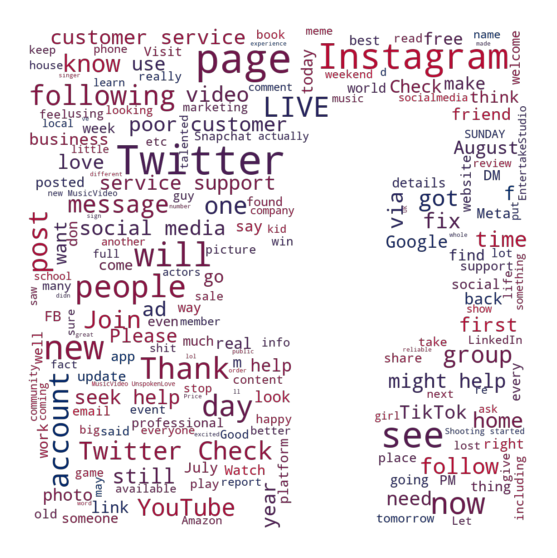

In [11]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,10)

mask = np.array(Image.open('facebook.png'))
stopwords = ["Facebook", "facebook", "RT"] + list(STOPWORDS) + list(id_stopwords)

from matplotlib.colors import LinearSegmentedColormap
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

allWords = ' '.join( [twts for twts in df_combined['Tweets']] )
wc = WordCloud(background_color=None, stopwords=stopwords, width=853, height=506, mask=mask, colormap=cmap,max_font_size = 90,mode='RGBA').generate(allWords)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [12]:
wc.to_file('wc_facebook.png')

In [14]:
# Create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show new dataframe!!!!
df

,Tweets,Subjectivity,Polarity
0,"Oh yes, I'm familiar with her toxicity. When...",0.450000,-0.004167
1,"Other than Facebook, so far……",0.375000,-0.125000
2,++not only multiple provinces of the country b...,0.540000,0.020000
3,Outsourcing 4 you offers you all the contact c...,0.213333,0.053333
4,"Zuckerberg has a plan to rescue Meta, but can ...",1.000000,0.600000
...,...,...,...
995,_swagg_er Sister you can check this fatwa if y...,0.000000,0.000000
996,@____Roar____ You're also WAY more tech savvy ...,0.800000,0.025000
997,A claim that the Hindu community is being forc...,0.300000,0.175000
998,Too cute!!!,1.000000,0.976562


In [15]:
# Computing negative, positive, and neutral analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Sentiment'] = df['Polarity'].apply(getAnalysis)

In [16]:
df1 = df[['Tweets','Sentiment']]
df1

,Tweets,Sentiment
0,"Oh yes, I'm familiar with her toxicity. When...",Negative
1,"Other than Facebook, so far……",Negative
2,++not only multiple provinces of the country b...,Positive
3,Outsourcing 4 you offers you all the contact c...,Positive
4,"Zuckerberg has a plan to rescue Meta, but can ...",Positive
...,...,...
995,_swagg_er Sister you can check this fatwa if y...,Neutral
996,@____Roar____ You're also WAY more tech savvy ...,Positive
997,A claim that the Hindu community is being forc...,Positive
998,Too cute!!!,Positive


In [18]:
df.to_csv('sa_facebook.csv')

In [14]:
ptweets = df[df.Sentiment == 'Positive']
ptweets = ptweets['Tweets']
A = round ((ptweets.shape[0] / df.shape[0])*100, 1)

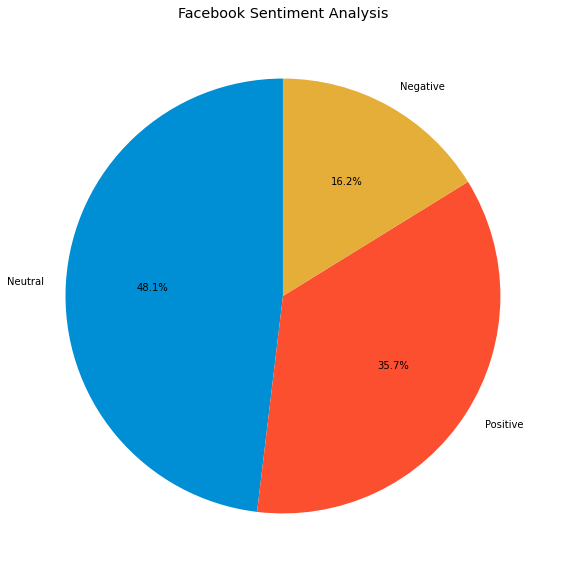

In [17]:
plt.pie(df['Sentiment'].value_counts(),autopct='%1.1f%%',labels=['Neutral','Positive','Negative'],startangle=90)
plt.title('Facebook Sentiment Analysis')
plt.show()

In [17]:
df['Tweets']

0              Just posted a photo @ Big Boys Toy Store 
1                    Just posted a photo @ Ben's Garden 
2                     Awesome recent trip to Hoover Dam 
3        You can easily recover your account acc with...
4       I’ve been stuck here for over two weeks. Plea...
                             ...                        
995    Let me guess, just another fucking Instagram i...
996                                 Just posted a photo 
997                                 Just posted a photo 
998                         NEW📲|  via instagram story: 
999    People laugh at faith. But God is a powerful i...
Name: Tweets, Length: 1000, dtype: object

(-0.5, 799.5, 799.5, -0.5)

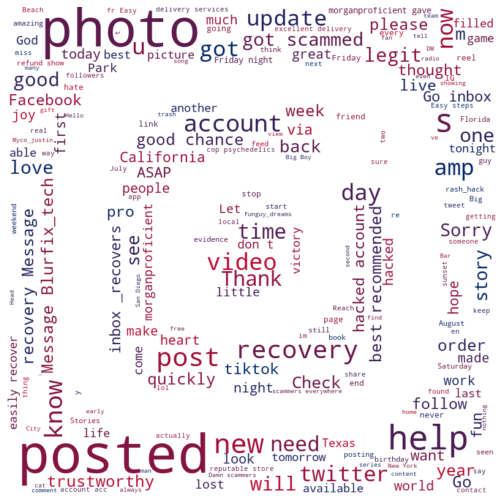

In [35]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)

mask = np.array(Image.open('instagram.png'))
stopwords = ["Instagram", "instagram", "RT", "fuck","shit"] + list(STOPWORDS) + list(id_stopwords)

from matplotlib.colors import LinearSegmentedColormap
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

allWords = ' '.join( [twts for twts in df['Tweets']] )
wc = WordCloud(background_color="white", stopwords=stopwords, width=853, height=506, mask=mask, colormap=cmap, max_font_size = 149).generate(allWords)

plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

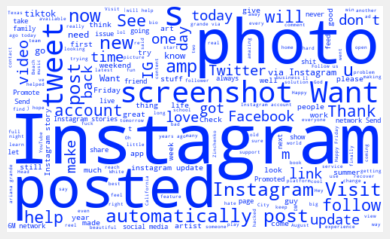

In [23]:
# Plot Word CLoud
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(230,100%%, %d%%)" % np.random.randint(49,51))
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110,background_color='white',colormap=plt.cm.inferno).generate(allWords)
wordCloud.recolor(color_func = grey_color_func)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()